In [3]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [4]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu126'

In [5]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [6]:
w = 0.7 #this is the weight
b = 0.3 #this is the bias

data = torch.arange(0 , 1 , 0.002).unsqueeze(dim=1)#this is our x
labels = w * data + b #this is our y

data[:-1] , labels[:-1]

(tensor([[0.0000],
         [0.0020],
         [0.0040],
         [0.0060],
         [0.0080],
         [0.0100],
         [0.0120],
         [0.0140],
         [0.0160],
         [0.0180],
         [0.0200],
         [0.0220],
         [0.0240],
         [0.0260],
         [0.0280],
         [0.0300],
         [0.0320],
         [0.0340],
         [0.0360],
         [0.0380],
         [0.0400],
         [0.0420],
         [0.0440],
         [0.0460],
         [0.0480],
         [0.0500],
         [0.0520],
         [0.0540],
         [0.0560],
         [0.0580],
         [0.0600],
         [0.0620],
         [0.0640],
         [0.0660],
         [0.0680],
         [0.0700],
         [0.0720],
         [0.0740],
         [0.0760],
         [0.0780],
         [0.0800],
         [0.0820],
         [0.0840],
         [0.0860],
         [0.0880],
         [0.0900],
         [0.0920],
         [0.0940],
         [0.0960],
         [0.0980],
         [0.1000],
         [0.1020],
         [0.

In [7]:
# Create train/test split
x_train , x_test , y_train , y_test = train_test_split(data , labels , test_size=0.2 , random_state=42)
len(x_train) , len(x_test) , len(y_train) , len(y_test)

(400, 100, 400, 100)

In [8]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(13, 8))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

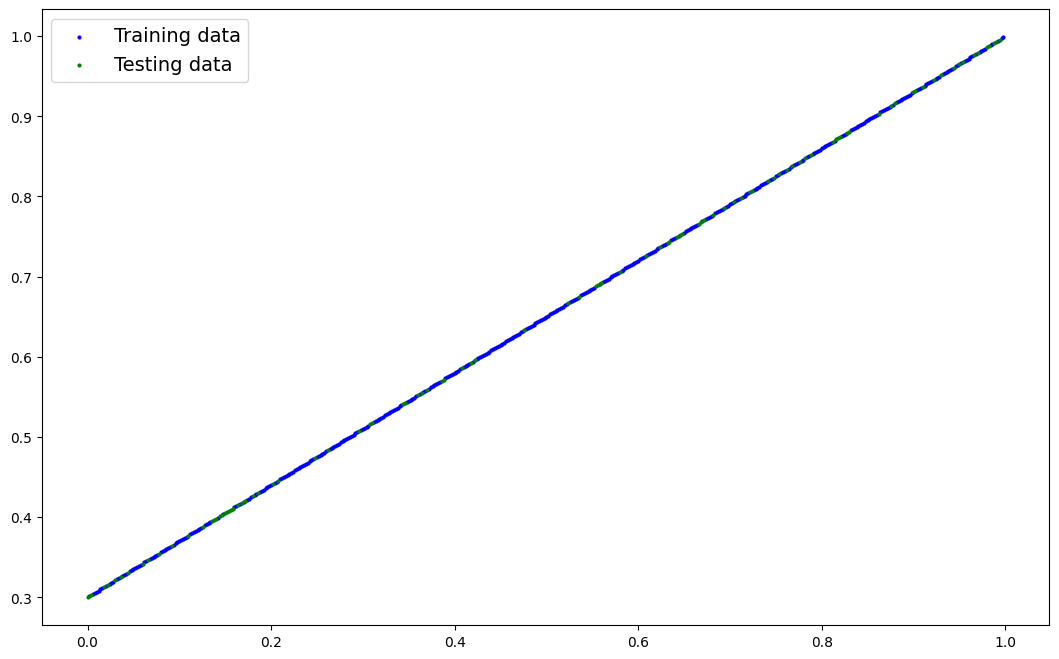

In [9]:
plot_predictions()

In [10]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [11]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(x_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [14]:
y_preds

tensor([[0.3719],
        [0.1780],
        [0.3807],
        [0.2332],
        [0.1988],
        [0.3941],
        [0.3827],
        [0.2123],
        [0.1746],
        [0.4318],
        [0.1349],
        [0.2594],
        [0.4022],
        [0.1854],
        [0.3786],
        [0.3901],
        [0.4621],
        [0.1490],
        [0.3416],
        [0.4035],
        [0.4588],
        [0.4594],
        [0.3174],
        [0.3685],
        [0.1800],
        [0.4392],
        [0.4635],
        [0.2709],
        [0.1968],
        [0.3537],
        [0.4487],
        [0.3551],
        [0.4251],
        [0.2453],
        [0.1302],
        [0.3530],
        [0.4042],
        [0.1759],
        [0.2695],
        [0.1712],
        [0.3874],
        [0.1914],
        [0.4554],
        [0.2534],
        [0.1510],
        [0.1807],
        [0.1288],
        [0.1362],
        [0.4083],
        [0.1436],
        [0.1773],
        [0.2514],
        [0.2170],
        [0.4049],
        [0.2588],
        [0

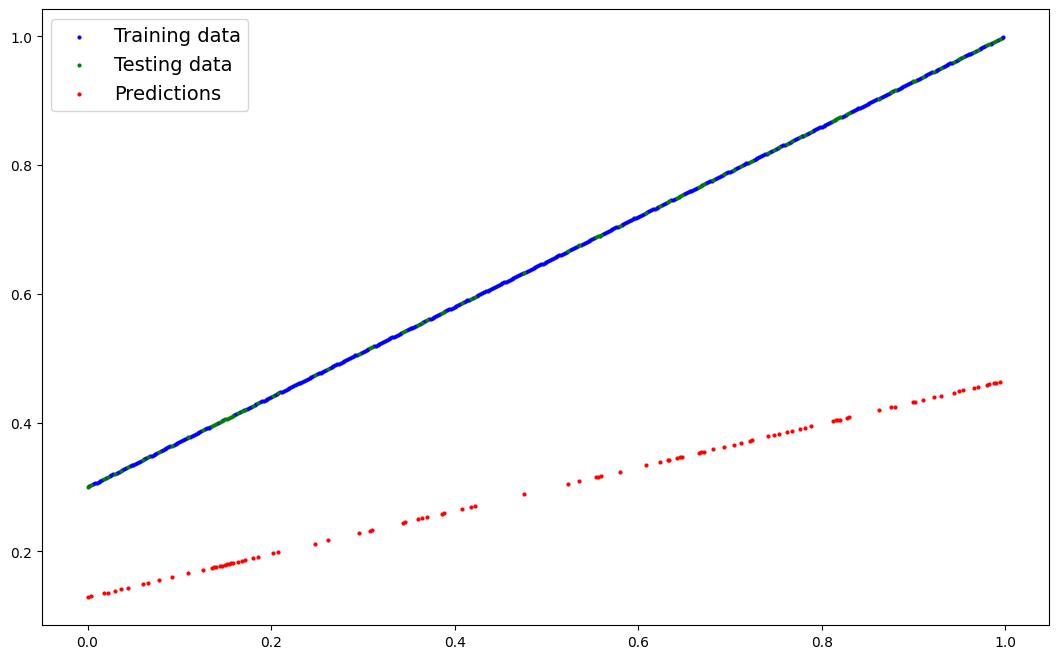

In [15]:
plot_predictions(predictions=y_preds)

In [16]:
print("loss")

loss


In [17]:
y_test - y_preds

tensor([[0.4335],
        [0.2242],
        [0.4429],
        [0.2838],
        [0.2468],
        [0.4575],
        [0.4451],
        [0.2613],
        [0.2206],
        [0.4982],
        [0.1777],
        [0.3122],
        [0.4662],
        [0.2322],
        [0.4408],
        [0.4531],
        [0.5309],
        [0.1930],
        [0.4008],
        [0.4677],
        [0.5272],
        [0.5280],
        [0.3746],
        [0.4299],
        [0.2264],
        [0.5062],
        [0.5323],
        [0.3245],
        [0.2446],
        [0.4139],
        [0.5163],
        [0.4153],
        [0.4909],
        [0.2969],
        [0.1726],
        [0.4132],
        [0.4684],
        [0.2221],
        [0.3231],
        [0.2170],
        [0.4502],
        [0.2388],
        [0.5236],
        [0.3056],
        [0.1952],
        [0.2271],
        [0.1712],
        [0.1792],
        [0.4727],
        [0.1872],
        [0.2235],
        [0.3034],
        [0.2664],
        [0.4691],
        [0.3114],
        [0

In [18]:
print("bad prediction lets train the model now ")

bad prediction lets train the model now 


In [19]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters() , lr=0.01)

In [20]:
# https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-optimization-loop-song.png

In [21]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(x_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(x_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.35141217708587646 | MAE Test Loss: 0.34422817826271057 
Epoch: 10 | MAE Train Loss: 0.22680512070655823 | MAE Test Loss: 0.21889065206050873 
Epoch: 20 | MAE Train Loss: 0.10669231414794922 | MAE Test Loss: 0.10305488854646683 
Epoch: 30 | MAE Train Loss: 0.05677252262830734 | MAE Test Loss: 0.06515274941921234 
Epoch: 40 | MAE Train Loss: 0.04590490832924843 | MAE Test Loss: 0.05428159609436989 
Epoch: 50 | MAE Train Loss: 0.04099838435649872 | MAE Test Loss: 0.047867123037576675 
Epoch: 60 | MAE Train Loss: 0.03640170395374298 | MAE Test Loss: 0.04229935258626938 
Epoch: 70 | MAE Train Loss: 0.03181850165128708 | MAE Test Loss: 0.03689158335328102 
Epoch: 80 | MAE Train Loss: 0.027235303074121475 | MAE Test Loss: 0.03148380666971207 
Epoch: 90 | MAE Train Loss: 0.022652214393019676 | MAE Test Loss: 0.026098990812897682 


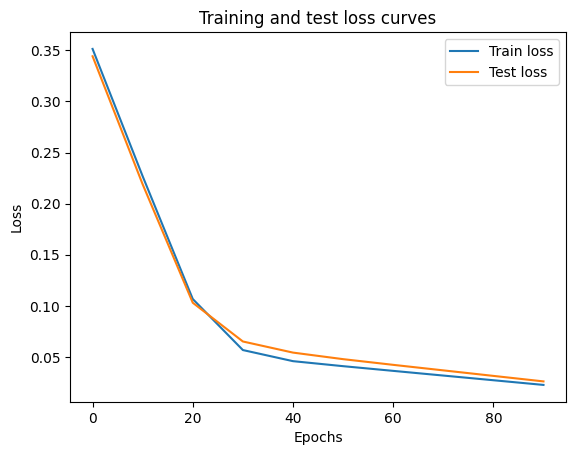

In [22]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [23]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {w}, bias: {b}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6255]), 'bias': tensor([0.3398])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [24]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(x_test)
y_preds

tensor([[0.7914],
        [0.4311],
        [0.8077],
        [0.5337],
        [0.4699],
        [0.8327],
        [0.8114],
        [0.4949],
        [0.4248],
        [0.9028],
        [0.3510],
        [0.5825],
        [0.8477],
        [0.4449],
        [0.8039],
        [0.8252],
        [0.9591],
        [0.3773],
        [0.7351],
        [0.8502],
        [0.9528],
        [0.9540],
        [0.6901],
        [0.7852],
        [0.4348],
        [0.9165],
        [0.9616],
        [0.6037],
        [0.4661],
        [0.7576],
        [0.9340],
        [0.7601],
        [0.8902],
        [0.5562],
        [0.3423],
        [0.7564],
        [0.8515],
        [0.4273],
        [0.6012],
        [0.4186],
        [0.8202],
        [0.4561],
        [0.9465],
        [0.5712],
        [0.3810],
        [0.4361],
        [0.3398],
        [0.3535],
        [0.8590],
        [0.3673],
        [0.4298],
        [0.5675],
        [0.5037],
        [0.8527],
        [0.5812],
        [0

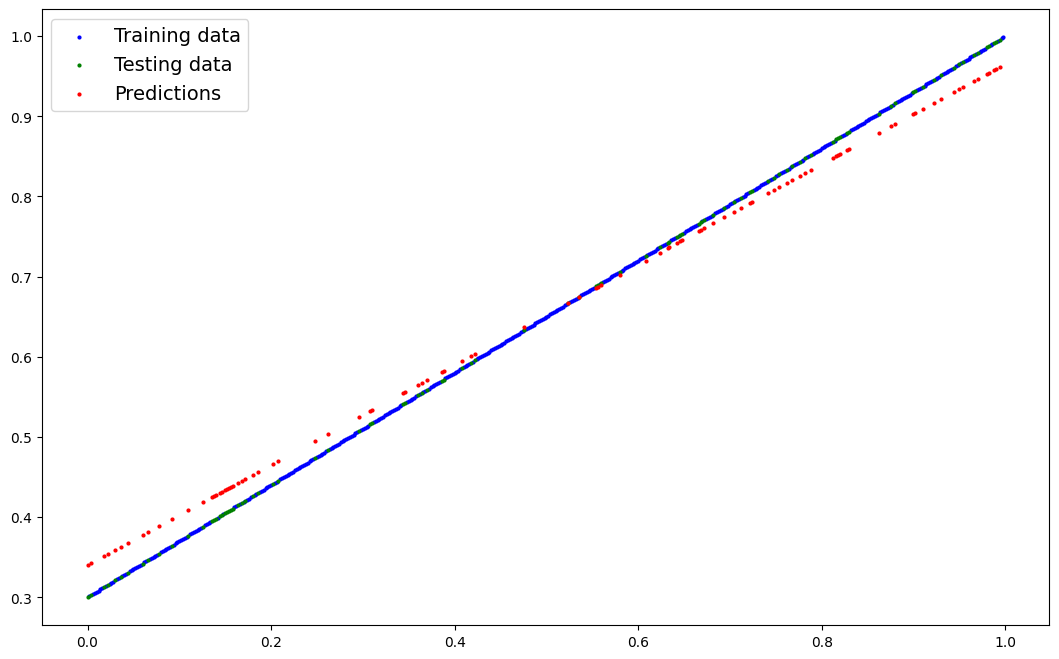

In [25]:
plot_predictions(predictions=y_preds)

In [26]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok = True )

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print("saving model")
torch.save(obj=model_0.state_dict() , f=MODEL_SAVE_PATH)

saving model


In [27]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 2117 Sep  6 17:29 models/01_pytorch_workflow_model_0.pth


In [28]:
#loading the saved model
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [29]:
#checking the loaded model works or not
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(x_test)


In [30]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        